In [1]:
from iotools import read_AsciiGrid
import matplotlib.pyplot as plt
import numpy as np
from overlandflow import OverlandFlowModel

In [2]:
ffdir = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_3case/flow_direction.asc'
fflowacc = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_3case/flow_accumulation.asc'
fstreams = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_3case/stream_mask.asc'
flakes = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_3case/lake_mask.asc'

fdir = read_AsciiGrid(ffdir)[0]
flowacc = read_AsciiGrid(fflowacc)[0]
streams = read_AsciiGrid(fstreams)[0]
lakes = read_AsciiGrid(flakes)[0]

# Example Usage
model = OverlandFlowModel(flowacc, fdir, streams, lakes, MaxPondSto=0.05)

In [3]:
# Run for multiple timesteps
for t in range(1):  # Simulate timesteps
    pondsto = np.random.uniform(0, 0.1, size=flowacc.shape)  # Random value
    pondsto[:,:] = 0.1
    pondsto[np.isnan(flowacc)] = np.nan
    pondsto0 = pondsto.copy()
    airspace = np.random.uniform(0, 0.1, size=flowacc.shape)  # Random value
    #airspace[:,:] = 0.
    airspace[np.isnan(flowacc)] = np.nan
    airspace0 = airspace.copy()
    results = model.run_timestep(pondsto, airspace)

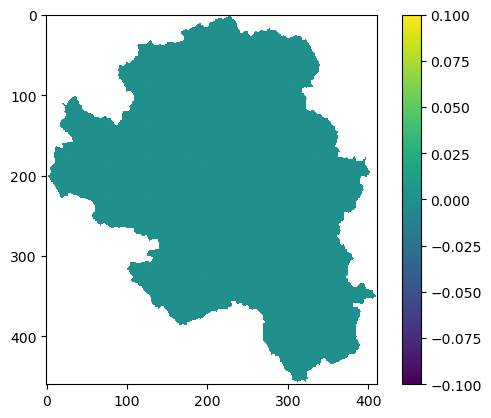

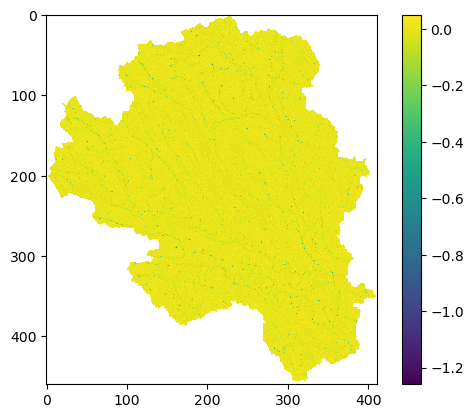

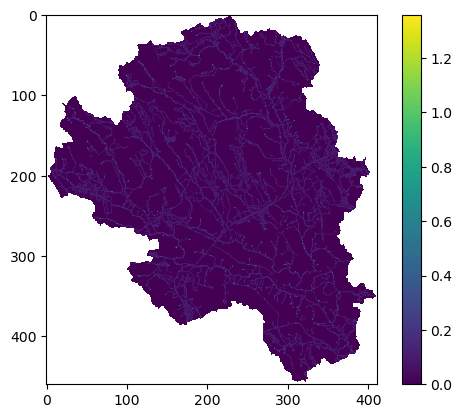

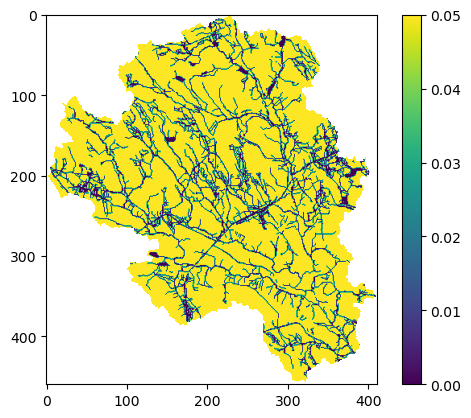

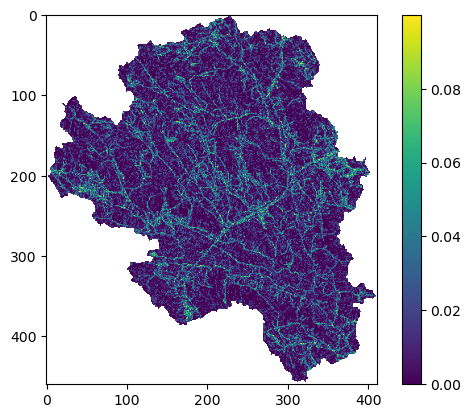

In [4]:
plt.figure(1)
plt.imshow(results['mbe']); plt.colorbar()
plt.figure(2)
plt.imshow(results['lateral_netflow']); plt.colorbar()
plt.figure(3)
plt.imshow(results['netflow_to_ditch']); plt.colorbar()
plt.figure(4)
plt.imshow(results['pond_storage']); plt.colorbar()
plt.figure(5)
plt.imshow(results['airspace']); plt.colorbar()
